In [7]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from statistics import mean

# Set Helvetica as the default font
mpl.rcParams['font.family'] = 'Helvetica'

In [10]:
# load data
with open("../Data/Preliminary_IRED_Screen.xlsx", 'rb') as f:
    data = pd.read_excel(f)

# Get labels (doesn't change order)
x = data["Name"]
l = [i[:-2] for i in list(x)]
IREDs = list(dict.fromkeys(l))
print(IREDs)

# set biosensor data to plot
yS = data["RFU/OD_RFP"]
yR = data["RFU/OD_GFP"]

#process data via a dictionary
data_dict = {}
for i in range(0,len(x)):
    l = x[i][:-2]
    if l not in data_dict:
        data_dict[l] = {"GFP": [yS[i]], "RFP": [yR[i]]}
    else:
        data_dict[l]["GFP"].append(yS[i])
        data_dict[l]["RFP"].append(yR[i])
#calculate averages
for i in data_dict.keys():
    data_dict[i]["avgGFP"] = mean(data_dict[i]["GFP"])
    data_dict[i]["avgRFP"] = mean(data_dict[i]["RFP"])

print(data_dict)



['EMPTY', 'S_IRED', 'R_IRED']
{'EMPTY': {'GFP': [np.float64(2700.0), np.float64(2497.076023), np.float64(2275.793651)], 'RFP': [np.float64(8958.015267), np.float64(9246.679317), np.float64(9289.424861)], 'avgGFP': np.float64(2490.956558), 'avgRFP': np.float64(9164.706481666666)}, 'S_IRED': {'GFP': [np.float64(8485.950413), np.float64(7615.131579), np.float64(18286.18421)], 'RFP': [np.float64(254607.7796), np.float64(172497.373), np.float64(235394.0397)], 'avgGFP': np.float64(11462.422067333333), 'avgRFP': np.float64(220833.0641)}, 'R_IRED': {'GFP': [np.float64(76904.99195), np.float64(79190.85174), np.float64(80917.35537)], 'RFP': [np.float64(22303.41113), np.float64(22216.63778), np.float64(22592.65734)], 'avgGFP': np.float64(79004.39968666667), 'avgRFP': np.float64(22370.902083333334)}}


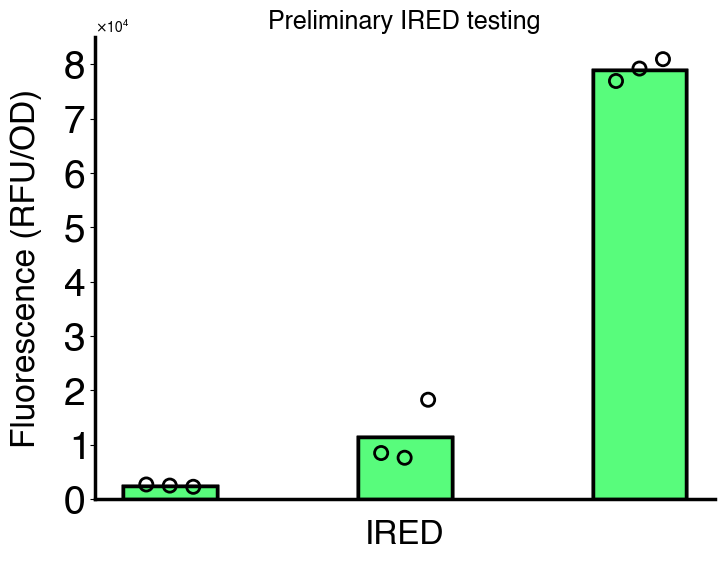

saved figure to SVG/Preliminary_IREDtest_pScreenS3.svg


In [18]:
#create plots
fig, ax = plt.subplots(figsize=(8, 6))
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

# The x locations for the groups
x = np.arange(3)*2

# Width of each bar
bar_width = 0.5

# Plot bars for each group
avgS = [i["avgGFP"] for i in data_dict.values()]
avgR = [i["avgRFP"] for i in data_dict.values()]
offset = [-0.2, 0, 0.2]

for i in range(0,len(IREDs)):
    plt.bar(x, avgS, color="#58fc7c", edgecolor="black", linewidth=2.5)
    c = 0
    for k in data_dict[IREDs[i]]["GFP"]:
        plt.scatter(x[i]+offset[c], k, edgecolor="#000000", color="None", s=90, zorder=20, linewidth=2.0)
        c += 1
    # plt.bar(x+0.9, avgR, color="#fca858", edgecolor="black", linewidth=2.5)
    # c = 0
    # for k in data_dict[IREDs[i]]["RFP"]:
    #     plt.scatter(x[i]+0.9+offset[c], k, edgecolor="#000000", color="None", s=90, zorder=20, linewidth=2.0)
    #     c += 1 


plt.title("Preliminary IRED testing", fontsize=18)
plt.xlabel("IRED", fontsize=24, labelpad=15)
plt.ylabel("Fluorescence (RFU/OD)", fontsize=24, labelpad=15)
plt.yticks(size=28)
plt.xticks([])
# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Setting y-axis to scientific notation
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.savefig("../SVG/Preliminary_IREDtest_pScreenS3.svg", format="svg")
plt.show()
print("saved figure to SVG/Preliminary_IREDtest_pScreenS3.svg")

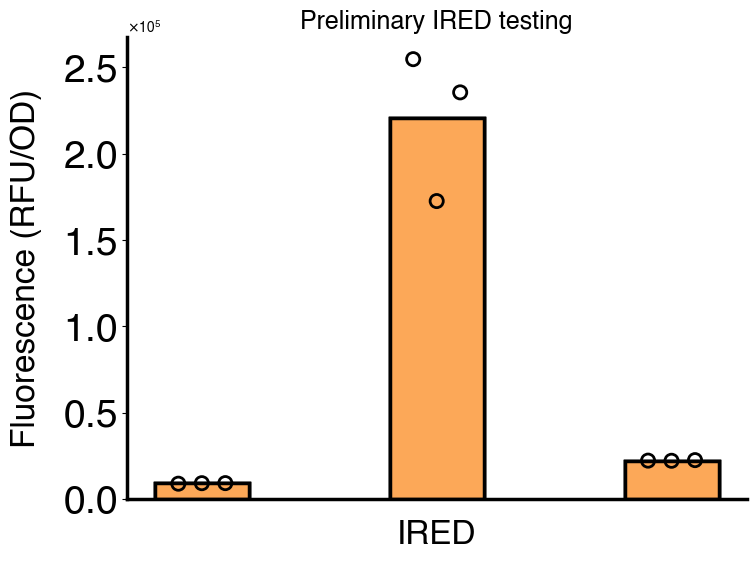

saved figure to SVG/Preliminary_IREDtest_pScreenR2.1.svg


In [19]:
#create plots
fig, ax = plt.subplots(figsize=(8, 6))
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

# The x locations for the groups
x = np.arange(3)*2

# Width of each bar
bar_width = 0.5

# Plot bars for each group
avgS = [i["avgGFP"] for i in data_dict.values()]
avgR = [i["avgRFP"] for i in data_dict.values()]
offset = [-0.2, 0, 0.2]

for i in range(0,len(IREDs)):
    # plt.bar(x, avgS, color="#58fc7c", edgecolor="black", linewidth=2.5)
    # c = 0
    # for k in data_dict[IREDs[i]]["GFP"]:
    #     plt.scatter(x[i]+offset[c], k, edgecolor="#000000", color="None", s=90, zorder=20, linewidth=2.0)
    #     c += 1
    plt.bar(x+0.9, avgR, color="#fca858", edgecolor="black", linewidth=2.5)
    c = 0
    for k in data_dict[IREDs[i]]["RFP"]:
        plt.scatter(x[i]+0.9+offset[c], k, edgecolor="#000000", color="None", s=90, zorder=20, linewidth=2.0)
        c += 1 


plt.title("Preliminary IRED testing", fontsize=18)
plt.xlabel("IRED", fontsize=24, labelpad=15)
plt.ylabel("Fluorescence (RFU/OD)", fontsize=24, labelpad=15)
plt.yticks(size=28)
plt.xticks([])
# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Setting y-axis to scientific notation
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.savefig("../SVG/Preliminary_IREDtest_pScreenR2.1.svg", format="svg")
plt.show()
print("saved figure to SVG/Preliminary_IREDtest_pScreenR2.1.svg")